## EXPLORATORY DATA ANALYSIS

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import t
import xgboost as xgb
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import scale
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
#Importing dataset

df = pd.read_csv('tourism.csv', encoding = 'unicode-escape', dtype = None, low_memory = False)

df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2
1,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2
2,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1
3,2002,January-March,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1
4,2002,January-March,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1


In [3]:
#changing values of quarter column

df = df.replace(['January-March', 'April-June', 'July-September', 'October-December'], ['Q1', 'Q2', 'Q3', 'Q4'])

In [4]:
#checking number of missing values in each column

df.isnull().sum()

year             0
quarter          0
market           0
dur_stay         0
mode             0
mode_detail      0
nationality      0
purpose          0
sex              0
age              0
package          0
Visits (000s)    0
Spend (£m)       0
Nights (000s)    0
sample           0
dtype: int64

In [5]:
#checking the shape of data

df.shape

(443010, 15)

In [6]:
#getting information about the dataset

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443010 entries, 0 to 443009
Data columns (total 15 columns):
year             443010 non-null object
quarter          443010 non-null object
market           443010 non-null object
dur_stay         443010 non-null object
mode             443010 non-null object
mode_detail      443010 non-null object
nationality      443010 non-null object
purpose          443010 non-null object
sex              443010 non-null object
age              443010 non-null object
package          443010 non-null object
Visits (000s)    443010 non-null float64
Spend (£m)       443010 non-null float64
Nights (000s)    443010 non-null float64
sample           443010 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 307.6 MB


In [7]:
#checking number of unique values in each column

df.nunique()

year                 18
quarter               4
market               73
dur_stay              6
mode                  3
mode_detail          11
nationality          75
purpose               6
sex                   3
age                   8
package               2
Visits (000s)    161313
Spend (£m)       370326
Nights (000s)    288171
sample               69
dtype: int64

In [8]:
#changing data types of some columns into category type

df[['quarter', 'dur_stay', 'mode', 'mode_detail', 'purpose', 'sex', 'age', 'package']] =  df[['quarter', 'dur_stay', 'mode', 'mode_detail', 'purpose', 'sex', 'age', 'package']].astype('category')

In [9]:
#inspecting values of year column

df.year.unique()

array(['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019P'], dtype=object)

In [10]:
#changing value in year column

df.year.replace('2019P', '2019', inplace = True)

In [11]:
#changing data type of year column

df['year'] = df['year'].astype('int64')

In [12]:
#renaming some columns 

col_names = {'Visits (000s)': 'visits', 'Spend (£m)': 'spend', 'Nights (000s)': 'nights'}
df = df.rename(columns = col_names)

In [13]:
#checking info 

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443010 entries, 0 to 443009
Data columns (total 15 columns):
year           443010 non-null int64
quarter        443010 non-null category
market         443010 non-null object
dur_stay       443010 non-null category
mode           443010 non-null category
mode_detail    443010 non-null category
nationality    443010 non-null object
purpose        443010 non-null category
sex            443010 non-null category
age            443010 non-null category
package        443010 non-null category
visits         443010 non-null float64
spend          443010 non-null float64
nights         443010 non-null float64
sample         443010 non-null int64
dtypes: category(8), float64(3), int64(2), object(2)
memory usage: 74.8 MB


In [14]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample
0,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2
1,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2
2,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1
3,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1
4,2002,Q1,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1


In [15]:
#adding 'per_tourist' column

df['per_tourist'] = df.spend / df.visits
df.per_tourist.fillna(0, inplace = True)

In [16]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample,per_tourist
0,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2,0.02703
1,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2,0.06200
2,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1,0.16200
3,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1,0.02700
4,2002,Q1,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1,0.00000


In [17]:
#basic descriptive statistics 

df.describe()

,year,visits,spend,nights,sample,per_tourist
count,443010.000000,443010.000000,443010.000000,443010.000000,443010.000000,4.430100e+05
mean,2010.182718,1.293075,0.729893,9.909916,1.807657,inf
std,4.995472,1.982608,1.899529,26.942452,2.451946,NaN
min,2002.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,2006.000000,0.392937,0.074671,1.181872,1.000000,1.400000e-01
50%,2010.000000,0.721019,0.260128,3.534925,1.000000,3.532536e-01
75%,2014.000000,1.425891,0.711861,9.134462,2.000000,8.164782e-01
max,2019.000000,62.593937,226.402128,4022.016250,78.000000,inf


In [18]:
df.head()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample,per_tourist
0,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,25-34,Independent,1.288285,0.034823,0.0,2,0.02703
1,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,35-44,Independent,0.522022,0.032365,0.0,2,0.06200
2,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,45-54,Independent,0.347127,0.056235,0.0,1,0.16200
3,2002,Q1,Belgium,Nil nights,Air,Air,UK,Business,Male,55-64,Independent,0.941973,0.025433,0.0,1,0.02700
4,2002,Q1,Belgium,Nil nights,Air,Air,UK,Transit,Male,25-34,Independent,0.000000,0.000000,0.0,1,0.00000


In [19]:
df.tail()

,year,quarter,market,dur_stay,mode,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights,sample,per_tourist
443005,2019,Q3,Other Africa,15+ nights,Air,Air,Other Africa,Study,Male,25-34,Independent,0.464177,0.835519,41.77593,1,1.800
443006,2019,Q3,Other Africa,15+ nights,Air,Air,Other Africa,Miscellaneous,Male,55-64,Independent,0.498113,1.003698,9.96226,1,2.015
443007,2019,Q3,Other Africa,Not Known,Air,Air,Kenya,Transit,Male,45-54,Independent,0.000000,0.000000,0.00000,1,0.000
443008,2019,Q3,Other Areas / Unknown,Not Known,Air,Air,Other areas / unknown,Holiday,Not Known,Not Known,Independent,0.000000,5.682977,0.00000,1,inf
443009,2019,Q3,Other Areas / Unknown,Not Known,Sea,Sea - Not Known,Other areas / unknown,Holiday,Not Known,Not Known,Independent,0.000000,5.682977,0.00000,1,inf


### QUESTIONS TO BE ANSWERED

1. What was the year with highest number of tourists?
2. Which market had the highest total quarterly visits to London?
3. What is the most popular mode of travel in 2017 for tourists from France?
4. Which market was the source of the most visitss for Business purpose in 2017?
5. What are the portions of visits according to purpose during each year?
6. Which market had the highest number of visitors traveled by the sea?
7. What age group traveled to London the most in 2014-2018 period?
8. is there any relationship between purpose of visit and money spent in UK, what graphs could best explain this relationship?

## What was the year with highest number of tourists?

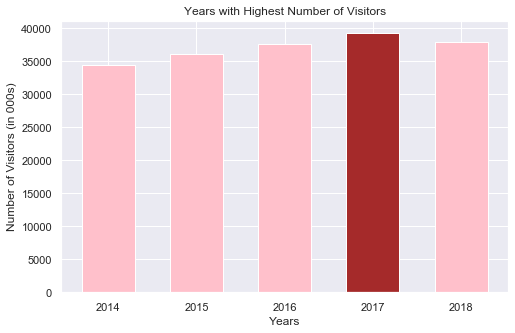

In [20]:
yearly_visits = df.groupby('year').visits.sum()
top5_yearly = yearly_visits.sort_values(ascending = False).head(5)

sns.set()
_ = plt.figure(figsize = (8, 5))
_ = plt.bar(top5_yearly.index, top5_yearly.values, width = 0.6, color=('brown', 'pink', 'pink', 'pink', 'pink'))
_ = plt.xlabel('Years')
_ = plt.ylabel('Number of Visitors (in 000s)')
_ = plt.title('Years with Highest Number of Visitors')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443010 entries, 0 to 443009
Data columns (total 16 columns):
year           443010 non-null int64
quarter        443010 non-null category
market         443010 non-null object
dur_stay       443010 non-null category
mode           443010 non-null category
mode_detail    443010 non-null category
nationality    443010 non-null object
purpose        443010 non-null category
sex            443010 non-null category
age            443010 non-null category
package        443010 non-null category
visits         443010 non-null float64
spend          443010 non-null float64
nights         443010 non-null float64
sample         443010 non-null int64
per_tourist    443010 non-null float64
dtypes: category(8), float64(4), int64(2), object(2)
memory usage: 30.4+ MB


## Which market had the highest total quarterly visits to London?

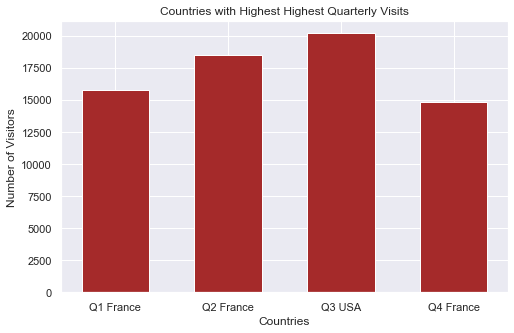

In [22]:
quarterly = df.groupby(['quarter', 'market']).visits.sum().unstack()

countries = pd.Series(quarterly.idxmax(axis = 1), name = 'Country')
visits = pd.Series(quarterly.max(axis = 1), name = 'Visits')

quarterly = pd.concat([countries, visits], axis = 1).reset_index()
quarterly['QCountry'] = quarterly.quarter.astype(str) + ' ' + quarterly.Country.astype(str)
quarterly.drop(columns = ['quarter', 'Country'], inplace = True)

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(quarterly.QCountry, quarterly.Visits, color = 'brown', width = 0.6)
_ = plt.xlabel('Countries')
_ = plt.ylabel('Number of Visitors')
_ = plt.title('Countries with Highest Highest Quarterly Visits')

## What is the most popular mode of travel in 2017 for tourists from France?

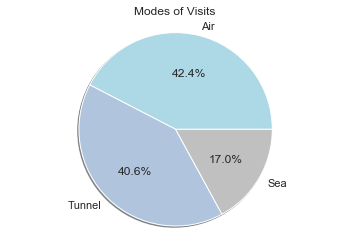

In [23]:
#Question3
grouped = df[(df['year'] == 2017) & (df['market'] == 'France')].groupby('mode').visits.sum()
sorted_group = pd.DataFrame(grouped.sort_values(ascending = False))

my_explode = (0, 0, 0)
my_colors = ['lightblue','lightsteelblue','silver']

_ = plt.pie(sorted_group['visits'], labels = ['Air', 'Tunnel', 'Sea'], autopct='%1.1f%%', radius = 1.5, explode = my_explode, shadow = True, colors = my_colors)

_ = plt.title('Modes of Visits')
_ = plt.axis('equal')

## Which market was the source of the most visits for Business purpose in 2017?

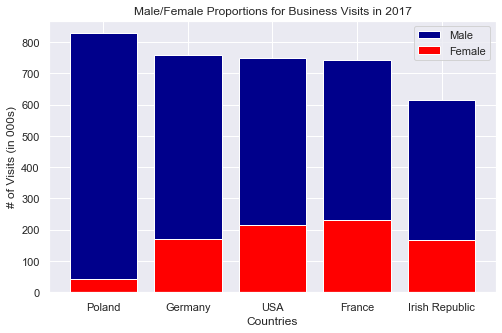

In [24]:
business2017 = df[(df.purpose == 'Business') & (df.year == 2017)]
business2017_market = pd.DataFrame(business2017.groupby(['market', 'sex'])['visits'].sum().unstack(), columns = ['Female', 'Male', 'NA'])

business2017_market['Total'] = business2017_market.Female + business2017_market.Male
business2017_market.drop(columns = 'NA', inplace = True)
business2017_top5market = business2017_market.sort_values(by = 'Total', ascending = False).head()

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(business2017_top5market.index, business2017_top5market.Total, color = 'darkblue', label = 'Male')
_ = plt.bar(business2017_top5market.index, business2017_top5market['Female'], color = 'red', label = 'Female')
_ = plt.title('Male/Female Proportions for Business Visits in 2017')
_ = plt.xlabel('Countries')
_ = plt.ylabel('# of Visits (in 000s)')
_ = plt.legend()
plt.show()

## What are the portions of visits according to purpose during each year?

In [25]:
#Question 5
purpose_by_year = pd.pivot_table(df, values = 'visits', index = 'year', columns = 'purpose', 
                                 aggfunc = np.sum, margins = True)

for column in purpose_by_year.columns:
    purpose_by_year[column] = ((purpose_by_year[column]/purpose_by_year['All'])*100).round(1)
    
purpose_by_year.drop('All', axis = 1, inplace = True)
purpose_by_year.drop('All', axis = 0, inplace = True)

purpose_by_year


purpose,Business,Holiday,Miscellaneous,Study,Transit,VFR
year,,,,,,
2002,29.6,32.0,9.1,2.8,0.0,26.5
2003,28.2,32.3,8.8,2.5,0.0,28.2
2004,26.9,33.4,9.2,2.1,0.0,28.3
2005,27.3,32.4,9.3,2.0,0.0,29.0
2006,27.6,32.3,9.2,2.1,0.0,28.8
2007,27.0,32.8,8.6,2.0,0.0,29.7
2008,25.5,34.3,8.0,1.8,0.0,30.5
2009,22.0,38.2,8.7,1.7,0.0,29.4
2010,22.8,39.2,8.2,1.7,0.0,28.2


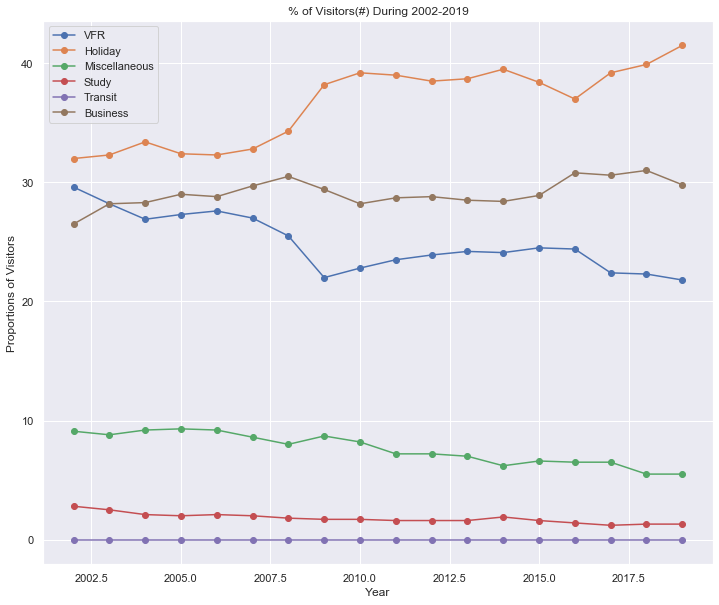

In [26]:
_ = plt.figure(figsize = (12, 10))

for column in purpose_by_year.columns:
    
    _ = plt.plot(purpose_by_year.index, purpose_by_year[column], marker='o')
    
_ = plt.xlabel('Year')
_ = plt.ylabel('Proportions of Visitors')
_ = plt.title('% of Visitors(#) During 2002-2019')
_ = plt.legend(('VFR', 'Holiday', 'Miscellaneous', 'Study', 'Transit', 'Business'))
plt.show()


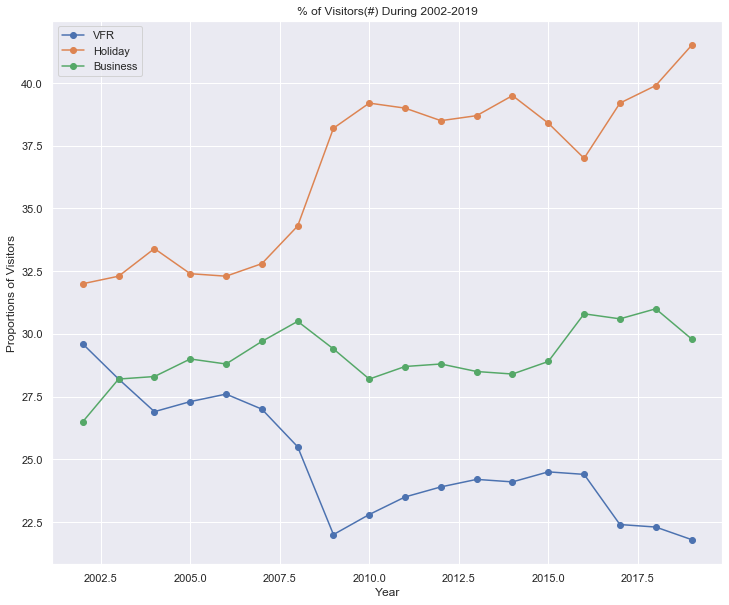

In [27]:
_ = plt.figure(figsize = (12, 10))


for column in ['Business', 'Holiday', 'VFR']:
    
    _ = plt.plot(purpose_by_year.index, purpose_by_year[column], marker='o')

_ = plt.xlabel('Year')
_ = plt.ylabel('Proportions of Visitors')
_ = plt.title('% of Visitors(#) During 2002-2019')
_ = plt.legend(('VFR', 'Holiday', 'Business'))
plt.show()

## Which market had the highest number of visitors traveled by the sea?

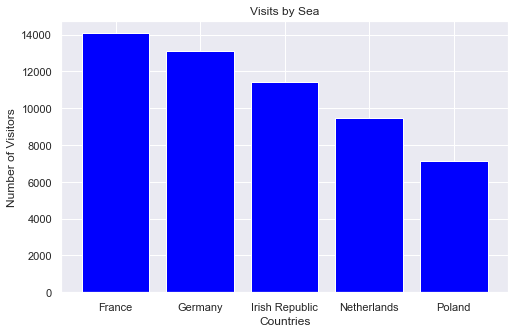

In [28]:
sea_visit = df[df['mode'] == 'Sea'].groupby('market').visits.sum().sort_values(ascending = False).head()

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(sea_visit.index, sea_visit.values, color = 'blue')
_ = plt.xlabel('Countries')
_ = plt.ylabel('Number of Visitors')
_ = plt.title('Visits by Sea')
plt.show()

## What age group traveled to London the most in 2014-2018 period?

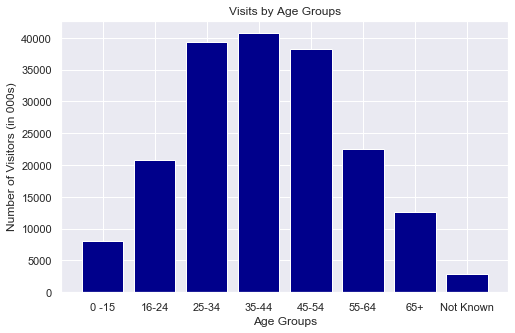

In [29]:
travel14_18 = df[(df['year'] > 2013) & (df['year'] < 2019)]
age14_18 = travel14_18.groupby('age').visits.sum()

_ = plt.figure(figsize = (8, 5))
_ = plt.bar(age14_18.index, age14_18.values, color = 'darkblue')
_ = plt.xlabel('Age Groups')
_ = plt.ylabel('Number of Visitors (in 000s)')
_ = plt.title('Visits by Age Groups')
plt.show()

## Is there any relationship between purpose of visit and money spent?

<BarContainer object of 6 artists>

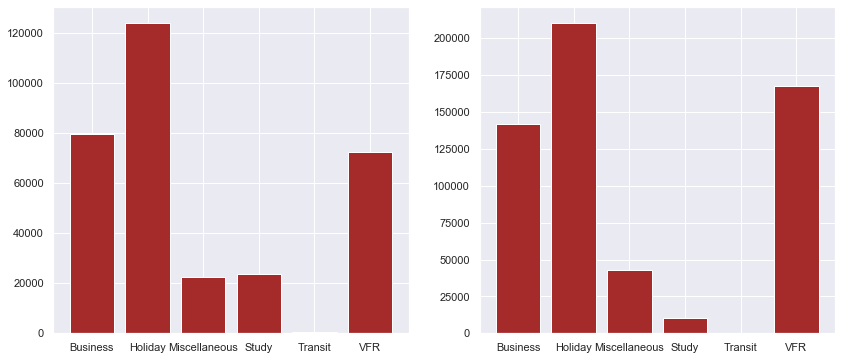

In [30]:
spent_by_purpose = df.groupby('purpose').spend.sum()
visits_by_purpose = df.groupby('purpose').visits.sum()

fig, axs = plt.subplots(1, 2, figsize = (14, 6))
axs[0].bar(spent_by_purpose.index, spent_by_purpose.values, color = 'brown')
axs[1].bar(visits_by_purpose.index, visits_by_purpose.values, color = 'brown')

## STATISTICAL ANALYSIS

In [31]:
data = df['spend']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.312, p=0.000
Probably not Gaussian


/Users/azarnajafli/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [32]:
mean_val = np.mean(df['spend'])
std = np.std(df['spend'])

degree_f = len(df['spend']) - 1
critical = t.ppf(0.05, degree_f)
SE = std/np.sqrt(len(df['spend']))
up_lim = mean_val + (critical * SE)
low_lim = mean_val - (critical * SE)
print(up_lim)
print(low_lim)

0.7251985488202447
0.7345870630794838


H0: Males and females spend the same

Ha: Males and females spend different 

In [33]:
sample0 = df[df['sex'] == 'Male'].spend
sample1 = df[df['sex'] == 'Female'].spend
t, p = ttest_ind(sample0, sample1)

print("p_value is: ", p)
if p<0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

p_value is:  2.2572766880972203e-36
reject null hypothesis


H0: Different age groups spend the same

Ha: Different age groups spend different

In [34]:
#ANOVA test
df_anova = df[['age','spend']]
ages = pd.unique(df_anova.age.values)
d_data = {age:df_anova['spend'][df_anova.age == age] for age in ages}
 
F, p = stats.f_oneway(d_data['0 -15'], d_data['16-24'], 
                      d_data['25-34'], d_data['35-44'], d_data['45-54'], 
                      d_data['55-64'], d_data['65+'],)
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  5.627741745389378e-140
reject null hypothesis


## CLASSIFICATION

### DATA PREPARATION

In [35]:
df.groupby('market').spend.sum().sort_values(ascending = False).head(3)

market
USA        48534.071769
Germany    21624.002630
France     20455.010556
Name: spend, dtype: float64

In [36]:
countries_of_interest = ['USA', 'Germany', 'France']
model_data = df[df.market.isin(countries_of_interest)]

In [37]:
model_data.shape

(103068, 16)

In [38]:
model_data = model_data.drop(columns = ['market','sample', 'per_tourist', 'mode'])
model_data.reset_index(inplace = True, drop = True)
model_data['year'] = model_data['year'].astype(str)

In [39]:
model_data.head()

,year,quarter,dur_stay,mode_detail,nationality,purpose,sex,age,package,visits,spend,nights
0,2002,Q1,Nil nights,Air,UK,Business,Male,16-24,Independent,0.314443,0.006918,0.0
1,2002,Q1,Nil nights,Air,UK,Business,Male,25-34,Independent,0.271330,0.000000,0.0
2,2002,Q1,Nil nights,Air,UK,Business,Male,45-54,Independent,1.171546,0.028784,0.0
3,2002,Q1,Nil nights,Air,UK,VFR,Female,35-44,Independent,0.672379,0.108925,0.0
4,2002,Q1,Nil nights,Air,UK,Transit,Male,55-64,Independent,0.000000,0.000000,0.0


In [40]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103068 entries, 0 to 103067
Data columns (total 12 columns):
year           103068 non-null object
quarter        103068 non-null category
dur_stay       103068 non-null category
mode_detail    103068 non-null category
nationality    103068 non-null object
purpose        103068 non-null category
sex            103068 non-null category
age            103068 non-null category
package        103068 non-null category
visits         103068 non-null float64
spend          103068 non-null float64
nights         103068 non-null float64
dtypes: category(7), float64(3), object(2)
memory usage: 4.6+ MB


In [41]:
classes = {'Independent': 0, 'Non-Independent': 1}
model_data.replace(classes, inplace = True)

In [42]:
model_data['package'] = model_data['package'].astype('category')

In [43]:
X = model_data.drop(columns = 'package')
X = pd.get_dummies(X)

y = model_data.package

In [44]:
X.shape

(103068, 134)

In [45]:
y.shape

(103068,)

In [46]:
y.value_counts(normalize=True)

0    0.891179
1    0.108821
Name: package, dtype: float64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

### Random Forest

In [48]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]



# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [49]:
clf_rf = RandomForestClassifier()

In [50]:
rf_random = RandomizedSearchCV(estimator = clf_rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [51]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 90.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 181.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [52]:
preds_rf = rf_random.predict(X_test)

In [53]:
metrics.confusion_matrix(y_test, preds_rf)

array([[22570,   387],
       [ 1517,  1293]])

### XGBoost

In [54]:
clf = xgb.XGBClassifier()

In [55]:
param_grid = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [56]:
xgb_random = RandomizedSearchCV(estimator = clf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)

In [57]:
xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 89.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distri

In [58]:
pred = xgb_random.predict(X_test)

In [60]:
xgb_random.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [62]:
matrix = metrics.confusion_matrix(y_test, pred)
matrix

array([[22435,   522],
       [ 1241,  1569]])

In [63]:
y_test.shape

(25767,)

In [64]:
TP = matrix[1,1]
TN = matrix[0,0]
FP = matrix[0,1]
FN = matrix[1,0]

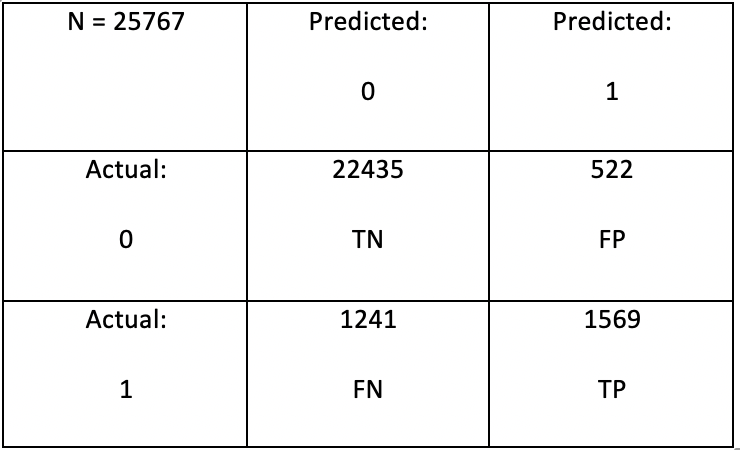

In [65]:
Image(filename= "/Users/azarnajafli/Pictures/Screenshots/Screen Shot 2020-05-11 at 2.02.16 AM.png", width = 500, height = 500)

In [66]:
precision = metrics.precision_score(y_test, pred)
print(precision)

0.7503586800573888


In [67]:
specifity = TN/(TN + FP)
print(specifity)

0.9772618373480856


In [68]:
recall = metrics.recall_score(y_test, pred)
print(recall)

0.5583629893238434


In [69]:
y_pred_prob = xgb_random.predict_proba(X_test)[:, 1]

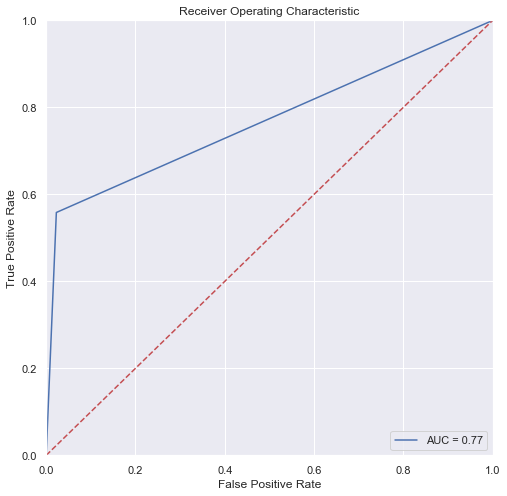

In [70]:
plt.figure(figsize = (8,8))

fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(0, 1)

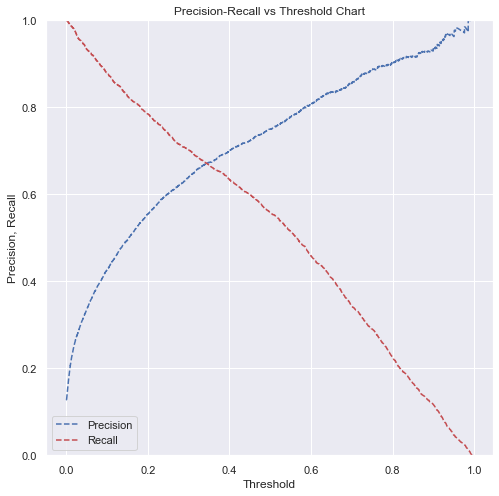

In [71]:
plt.figure(figsize = (8, 8))

probs_y=xgb_random.predict_proba(X_test) 

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 

pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [72]:
y_pred_prob

array([2.4881938e-01, 6.0979003e-01, 5.3543644e-04, ..., 4.7563221e-02,
       4.1708133e-01, 1.5621992e-04], dtype=float32)

In [73]:
y_pred_prob = y_pred_prob.reshape(-1, 1)

In [74]:
y_pred_class = binarize(y_pred_prob, 0.3)

In [75]:
y_pred_class

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [76]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[21844,  1113],
       [  838,  1972]])

In [77]:
metrics.recall_score(y_test, y_pred_class)

0.701779359430605

In [78]:
metrics.precision_score(y_test, y_pred_class)

0.6392220421393842